In [8]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import random 


"Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. *Currently, there are 5 types of packages the company is offering - **Basic, Standard, Deluxe, Super Deluxe, King**.* Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. **Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being**.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also **build a model to predict the potential customer who is going to purchase the newly introduced travel package**.

In [10]:
df = pd.read_csv(r'Travel.csv')

In [11]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [12]:
df.shape

(4888, 20)

In [15]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [19]:
df['Gender'].value_counts()


Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [21]:
df['Gender'].replace('Fe Male', 'Female', inplace = True)

In [23]:
df['Gender'].value_counts()

Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [25]:
df[df['Age'].isnull()].groupby('Gender')['Age'].size()

Gender
Female     82
Male      144
Name: Age, dtype: int64

In [27]:
round(df.groupby('Gender')['Age'].mean(),0)

Gender
Female    38.0
Male      37.0
Name: Age, dtype: float64

In [29]:
df['Age'].fillna(round(df.groupby('Gender')['Age'].transform(lambda x:x.mean()),0), inplace=True)

In [31]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [33]:
df['Occupation'].value_counts()

Occupation
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: count, dtype: int64

In [35]:

df['ProductPitched'].value_counts()


ProductPitched
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: count, dtype: int64

In [37]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [38]:
df['MaritalStatus'].replace('Unmarried','Single').value_counts()

MaritalStatus
Married     2340
Single      1598
Divorced     950
Name: count, dtype: int64

In [39]:
df['MaritalStatus'].replace('Unmarried','Single', inplace = True)

df['Designation'].value_counts()

In [41]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# Handling missing value 

In [43]:
df.groupby(['Gender','Designation'])['NumberOfTrips'].count()

Gender  Designation   
Female  AVP                146
        Executive          677
        Manager            724
        Senior Manager     325
        VP                  56
Male    AVP                146
        Executive         1160
        Manager           1006
        Senior Manager     416
        VP                  92
Name: NumberOfTrips, dtype: int64

In [44]:
df['Designation'].value_counts()

Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64

## I am gonna replace all the missing data with **Executive and Manager**

In [46]:
(1842/(1842+1732))*100

51.53889199776162

In [47]:
lis = ['Exacutive', 'Manager']
df['Designation'].fillna(lambda x:x.random.choice(lis), inplace = True)

## Here i am planning to replace all the Missing MonthlySalary with the Designation and Gender of the employee

In [49]:
round(df.groupby(['Designation', 'Gender'])['MonthlyIncome'].mean(),0)

Designation     Gender
AVP             Female    32212.0
                Male      32267.0
Executive       Female    20164.0
                Male      19810.0
Manager         Female    22487.0
                Male      22754.0
Senior Manager  Female    26852.0
                Male      26470.0
VP              Female    35573.0
                Male      36048.0
Name: MonthlyIncome, dtype: float64

In [50]:
df['MonthlyIncome'].fillna(df.groupby(['Designation', 'Gender'])['MonthlyIncome'].transform(lambda x:round(x.mean(),0)), inplace = True)

In [51]:
df['DurationOfPitch'].value_counts()

DurationOfPitch
9.0      483
7.0      342
8.0      333
6.0      307
16.0     274
15.0     269
14.0     253
10.0     244
13.0     223
11.0     205
12.0     195
17.0     172
30.0      95
22.0      89
31.0      83
23.0      79
18.0      75
29.0      74
32.0      74
25.0      73
21.0      73
27.0      72
26.0      72
24.0      70
35.0      66
20.0      65
28.0      61
33.0      57
19.0      57
34.0      50
36.0      44
5.0        6
126.0      1
127.0      1
Name: count, dtype: int64

C:\Users\yniku\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='DurationOfPitch', ylabel='Count'>

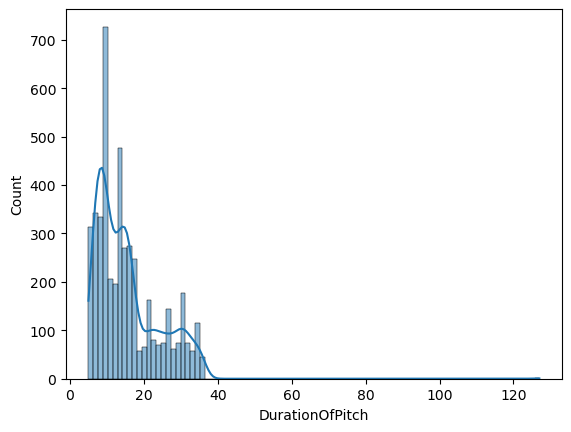

In [52]:
sns.histplot(df['DurationOfPitch'], kde = True)

In [53]:
## Reoplacing DurationOfPitch with mean would be good choice 


In [54]:
df['DurationOfPitch'].fillna(round(df['DurationOfPitch'].mean(), 0), inplace = True)

In [55]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome                 0
dtype: int64

In [56]:
df['NumberOfChildrenVisiting'].value_counts()

NumberOfChildrenVisiting
1.0    2080
2.0    1335
0.0    1082
3.0     325
Name: count, dtype: int64

In [57]:
## I am going to replace nan value with 0 in NumberOfChildrenVisiting 
df['NumberOfChildrenVisiting'].fillna(0, inplace = True)

In [75]:
df['PreferredPropertyStar'].value_counts()

PreferredPropertyStar
3.0    2993
5.0     956
4.0     913
Name: count, dtype: int64

In [76]:
x = ['Designation', 'MaritalStatus', 'ProductPitched','PreferredPropertyStar']
df.groupby(x)['PreferredPropertyStar'].count()

Designation     MaritalStatus  ProductPitched  PreferredPropertyStar
AVP             Divorced       Super Deluxe    3.0                       52
                                               4.0                       12
                                               5.0                       24
                Married        Super Deluxe    3.0                      108
                                               4.0                       26
                                               5.0                       32
                Single         Super Deluxe    3.0                       52
                                               4.0                       24
                                               5.0                       12
Executive       Divorced       Basic           3.0                      202
                                               4.0                       68
                                               5.0                       61
                Mar

In [77]:
df.dropna(subset=['PreferredPropertyStar'], inplace=True)

In [78]:
df['PreferredPropertyStar'].isnull().sum()

0

In [79]:
y = ['Occupation', 'TypeofContact']
df.groupby(y)['TypeofContact'].count()

# df['TypeofContact'].value_counts()

Occupation      TypeofContact  
Free Lancer     Self Enquiry          2
Large Business  Company Invited     110
                Self Enquiry        322
Salaried        Company Invited     722
                Self Enquiry       1625
Small Business  Company Invited     583
                Self Enquiry       1473
Name: TypeofContact, dtype: int64

In [80]:
df.dropna(subset = ['TypeofContact'],inplace =True)

In [81]:
df.dropna(subset = ['NumberOfFollowups'],inplace =True)

In [82]:
df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0    2046
3.0    1456
5.0     760
2.0     228
1.0     172
6.0     130
Name: count, dtype: int64

In [83]:
## I thik i should randomly replace exacutive and manger

df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(), inplace = True)

In [84]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4792 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4792 non-null   int64  
 1   ProdTaken                 4792 non-null   int64  
 2   Age                       4792 non-null   float64
 3   TypeofContact             4792 non-null   object 
 4   CityTier                  4792 non-null   int64  
 5   DurationOfPitch           4792 non-null   float64
 6   Occupation                4792 non-null   object 
 7   Gender                    4792 non-null   object 
 8   NumberOfPersonVisiting    4792 non-null   int64  
 9   NumberOfFollowups         4792 non-null   float64
 10  ProductPitched            4792 non-null   object 
 11  PreferredPropertyStar     4792 non-null   float64
 12  MaritalStatus             4792 non-null   object 
 13  NumberOfTrips             4792 non-null   float64
 14  Passport     

In [86]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000
mean,202451.252087,0.188439,37.588689,1.652546,15.488314,2.909015,3.706177,3.581386,3.229132,0.293406,3.075125,0.618948,1.173414,23475.691987
std,1410.575317,0.391103,9.058500,0.916293,8.335775,0.723279,0.999091,0.797913,1.819696,0.455370,1.365936,0.485696,0.862117,5099.426587
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201230.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.750000
50%,202459.500000,0.000000,37.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22430.500000
75%,203674.250000,0.000000,43.000000,3.000000,19.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25407.750000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### Feature Engineering

In [88]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [89]:
## Dropping CustomerId 
df.drop('CustomerID', axis = 1, inplace = True) 

In [90]:
### Creating New column 
df['TotalVisit'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
# dropping these two column 
df.drop(['NumberOfPersonVisiting','NumberOfChildrenVisiting'], axis = 1, inplace = True)


In [91]:
## number of features 
Categorical_Feature = [feature for feature in df.columns if df[feature].dtypes =='O']
print('Number of Categorical Features',len(Categorical_Feature))
print(Categorical_Feature)

Number of Categorical Features 6
['TypeofContact', 'Occupation', 'Gender', 'ProductPitched', 'MaritalStatus', 'Designation']


In [92]:
## number of Numeric features 
Numeric_feature = [feature for feature in df.columns if df[feature].dtypes !='O']
print('Number of Numeric Features',len(Numeric_feature))
print(Numeric_feature)

Number of Numeric Features 12
['ProdTaken', 'Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisit']


In [93]:
### Number of Discrete Feature 
Discrete = [feature for feature in Numeric_feature if len(df[feature].unique()) <=25]
print('Number of Discrete Feature', len(Discrete))
print(Discrete)

Number of Discrete Feature 9
['ProdTaken', 'CityTier', 'NumberOfFollowups', 'PreferredPropertyStar', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar', 'TotalVisit']


In [94]:
## Conts Feature 
Cont  = [feature for feature in Numeric_feature if len(df[feature].unique()) > 25]
print('Number of Discrete Feature', len(Cont))
print(Cont)

Number of Discrete Feature 3
['Age', 'DurationOfPitch', 'MonthlyIncome']


In [95]:
## Dependent Feature 
x = df.drop('ProdTaken', axis = 1)
## Independent Feature 
y = df['ProdTaken']

In [96]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)
x_train.shape , x_test.shape

((3210, 17), (1582, 17))

In [97]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Select categorical and numerical features
cat_features = x.select_dtypes(include="object").columns 
num_features = x.select_dtypes(exclude="object").columns 

# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop="first")

# Create the column transformer
preprocessor = ColumnTransformer([
    ("OneHotEncoder", oh_transformer, cat_features), 
    ("StandardScaler", numeric_transformer, num_features)
])

In [120]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisit'],
      dtype='object'))])

In [121]:
x_train = preprocessor.fit_transform(x_train)

In [122]:
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.720561,-0.766680,0.288015,-0.728256,-0.680354,-0.644956,-1.520747,0.773182,-1.411056,-0.774177
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.455357,0.181288,0.288015,1.762636,0.971641,-0.644956,1.412465,-1.293357,-0.622509,-0.774177
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.720561,-1.003671,-0.722398,-0.728256,-0.680354,-0.644956,-1.520747,0.773182,-0.664062,0.631427
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,-0.720561,-0.885176,-0.722398,-0.728256,2.072971,-0.644956,1.412465,-1.293357,1.778528,-1.476978
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.720561,-0.885176,-0.722398,0.517190,-0.680354,-0.644956,0.679162,-1.293357,-1.201559,-0.071375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.720561,0.892263,1.298427,-0.728256,2.623636,-0.644956,1.412465,-1.293357,0.030028,-0.071375
3206,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.367398,-0.766680,-0.722398,0.517190,-0.680354,-0.644956,-0.787444,0.773182,1.843743,-1.476978
3207,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.720561,0.892263,0.288015,0.517190,-0.680354,-0.644956,-0.787444,0.773182,-0.409165,-0.071375
3208,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.720561,-1.003671,0.288015,0.517190,-0.129689,-0.644956,1.412465,-1.293357,-0.228909,1.334229


class sklearn.ensemble.AdaBoostClassifier(estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)

In [127]:
x_test = preprocessor.transform(x_test)

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,mean_squared_error,r2_score

In [131]:
## Creating models 
models = {
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN' : KNeighborsClassifier(),
    'AdaBoost' : AdaBoostClassifier(),
    'GradientBoosting' : GradientBoostingClassifier(),
    'XgBoostClassifier' : XGBClassifier()
    
}

for key, model in models.items():
    model.fit(x_train, y_train)
    
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # checking accurecy of my model for traning DATA
    acc_score_train = accuracy_score(y_train, y_pred_train)
    f1_score_train = f1_score(y_train, y_pred_train)
    precision_score_train = precision_score(y_train, y_pred_train)
    recall_train = recall_score(y_train, y_pred_train)
    roc_score_train = roc_auc_score(y_train, y_pred_train)
    
    ##checking for test data
    acc_score_test = accuracy_score(y_test, y_pred_test)
    f1_score_test = f1_score(y_test, y_pred_test)
    precision_score_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    roc_score_test = roc_auc_score(y_test, y_pred_test)
    
    ## Printing output
    print(key)
    print('\n MOdel Preformance for traning dataset')
    print('Accurecy', acc_score_train)
    print('F1 Score',f1_score_train)
    print('Precision',precision_score_train)
    print('Recall',recall_train)
    print('Roc Auc Score',roc_score_train)
    
    #print('--------------------------------------\n')
    
    print('\nMOdel Preformance on Test DataSet')
    
    print('Accurecy', acc_score_test)
    print('F1 Score',f1_score_test)
    print('Precision',precision_score_test)
    print('Recall',recall_test)
    print('Roc Auc Score',roc_score_test)
    
    print('\n-----------------------------------')
    print('\n')

print("----------------Execution Finished----------------")

Logistic Regression

 MOdel Preformance for traning dataset
Accurecy 0.8445482866043613
F1 Score 0.443701226309922
Precision 0.708185053380783
Recall 0.32305194805194803
Roc Auc Score 0.6457202685518029

MOdel Preformance on Test DataSet
Accurecy 0.8476611883691529
F1 Score 0.4329411764705882
Precision 0.6666666666666666
Recall 0.3205574912891986
Roc Auc Score 0.6425181278839815

-----------------------------------


Random Forest

 MOdel Preformance for traning dataset
Accurecy 1.0
F1 Score 1.0
Precision 1.0
Recall 1.0
Roc Auc Score 1.0

MOdel Preformance on Test DataSet
Accurecy 0.9361567635903919
F1 Score 0.7967806841046278
Precision 0.9428571428571428
Recall 0.6898954703832753
Roc Auc Score 0.8403145305584331

-----------------------------------


Decision Tree

 MOdel Preformance for traning dataset
Accurecy 1.0
F1 Score 1.0
Precision 1.0
Recall 1.0
Roc Auc Score 1.0

MOdel Preformance on Test DataSet
Accurecy 0.9140328697850821
F1 Score 0.7571428571428571
Precision 0.776556776556

### We have got the heighest accuracy from the random forest algorethim

## Hyper Parameter tuning 

 class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0

In [161]:
## Hyperparameter Training

rf_params = {"max_depth": [5, 8, 15, None, 10,20],
            "max_features": [5, 7, "auto", 8,10],
            'min_samples_split': [2, 8, 15,100, 201],
            "n_estimators": [100, 200, 500, 1000]
            }
# adaboost_params = {
#             'n_estimators': [50,100,150,200,500,1000],
#             'algorithm': ['SAMME', 'SAMME.R']
                    
#                 }

# GradientBoosting_params = { 'learning_rate': [0.001, 0.01, 0.05, 0.1],
#                            'n_estimators' : [100,300,500,1000, 800],
#                            'criterion': ['friedman_mse', 'squared_error'],
#                            'min_samples_split' : [4,8,12,18,20],
#                            'min_samples_leaf' : [150,50,100,200,500],
#                            'max_features' : ['sqrt', 'log2', 'None']
#                           }

# xgb_params = { 'max_depth':  [10, 8, 15, 20,30,40],
#               'min_child_weight' : [2,3,5,7,10],
#               'eta' : [0.00001,0.001,0.01],
#               #'subsample': [0.5, 0.7]
#               'gamma' : [0.7,0.9]
              
# }

xgb_params = {'max_depth': [10, 15, 20, 25],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.5, 1, 0.9],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'eta': [0.01, 0.05, 0.1, 0.3],
    'alpha': [0, 0.1, 1],
    'lambda': [1, 1.5, 2]
             }

In [163]:
# Models List for Hyperparameter tuning |
randomcv_models = [
                    #("RF", RandomForestClassifier(), rf_params),
    
                    #("AB", AdaBoostClassifier(), adaboost_params)
                    #("GradientBoost", GradientBoostingClassifier(), GradientBoosting_params)
                    ("XBG", XGBClassifier(), xgb_params)
    
]

In [165]:
randomcv_models

[('XBG',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  {'max_depth': [10, 15, 20, 25],
   'min_child_weight': [1, 3, 5, 7],
   'gamma': [0, 0.1, 0.5, 1, 0.9],
   'subsample': [0.6, 0.8, 1.0],
   'colsample_bytree': [0.6, 0.8, 1.0],
   'eta': [0.01, 0.05, 0.1, 0.3

class sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=nan, return_train_score=False)[source]


In [167]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    estimator = RandomizedSearchCV(estimator= model,param_distributions = params, cv = 5, verbose = 2, n_iter = 100, n_jobs = -1)
    estimator.fit(x_train, y_train)
    model_param[name] = estimator.best_params_
    

    for model_name in model_param:
        print(f'----------Best Parameaters for Model {model_name}----------')
        print(model_param[model_name])
    

Fitting 5 folds for each of 100 candidates, totalling 500 fits
----------Best Parameaters for Model XBG----------
{'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 10, 'lambda': 1, 'gamma': 0.1, 'eta': 0.3, 'colsample_bytree': 0.8, 'alpha': 0.1}


In [180]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}
for name, model, params in randomcv_models:
    estimator = RandomizedSearchCV(estimator= model,param_distributions = params, cv = 5, verbose = 3, n_iter = 100, n_jobs = -1)
    estimator.fit(x_train, y_train)
    model_param[name] = estimator.best_params_
    

    for model_name in model_param:
        print(f'----------Best Parameaters for Model {model_name}----------')
        print(model_param[model_name])
    

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\yniku\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yniku\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yniku\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py", line 420, in fit
    self._validate_params()
  File "C:\Users\yniku\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\yniku\anaconda3\Lib\site-packages

----------Best Parameaters for Model GradientBoost----------
{'n_estimators': 800, 'min_samples_split': 18, 'min_samples_leaf': 50, 'max_features': 'sqrt', 'learning_rate': 0.1, 'criterion': 'squared_error'}


In [179]:
## Creating models 
models = {
    'Random Forest' : RandomForestClassifier(n_estimators= 100, min_samples_split= 2, max_features= 7, max_depth = None),
    #'AdaBoost' : AdaBoostClassifier(n_estimators = 500, algorithm =  'SAMME'),
   # 'GradientBoost' : GradientBoostingClassifier(n_estimators = 800, min_samples_split = 18, min_samples_leaf= 50, max_features= 'sqrt', learning_rate= 0.1, criterion = 'squared_error'),
    'XGBClassifier': XGBClassifier(subsample = 0.8, min_child_weight = 1, max_depth= 10, lambda_ = 1, gamma= 0.1, eta = 0.3, colsample_bytree =0.8, alpha = 0.1)
    
}

for key, model in models.items():
    model.fit(x_train, y_train)
    
    y_pred_test = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    
    # checking accurecy of my model for traning DATA
    acc_score_train = accuracy_score(y_train, y_pred_train)
    f1_score_train = f1_score(y_train, y_pred_train,average='weighted')
    precision_score_train = precision_score(y_train, y_pred_train,average='weighted')
    recall_train = recall_score(y_train, y_pred_train, average='weighted')
    roc_score_train = roc_auc_score(y_train, y_pred_train)
    
    ##checking for test data
    acc_score_test = accuracy_score(y_test, y_pred_test)
    f1_score_test = f1_score(y_test, y_pred_test,average='weighted')
    precision_score_test = precision_score(y_test, y_pred_test,average='weighted')
    recall_test = recall_score(y_test, y_pred_test,average='weighted')
    roc_score_test = roc_auc_score(y_test, y_pred_test)
    
    ## Printing output
    print(key)
    print('\n MOdel Preformance for traning dataset')
    print('Accurecy', acc_score_train)
    print('F1 Score',f1_score_train)
    print('Precision',precision_score_train)
    print('Recall',recall_train)
    print('Roc Auc Score',roc_score_train)
    
    #print('--------------------------------------\n')
    
    print('\nMOdel Preformance on Test DataSet')
    
    print('Accurecy', acc_score_test)
    print('F1 Score',f1_score_test)
    print('Precision',precision_score_test)
    print('Recall',recall_test)
    print('Roc Auc Score',roc_score_test)
    
    print('\n-----------------------------------')
    print('\n')
    

Random Forest

 MOdel Preformance for traning dataset
Accurecy 1.0
F1 Score 1.0
Precision 1.0
Recall 1.0
Roc Auc Score 1.0

MOdel Preformance on Test DataSet
Accurecy 0.9380530973451328
F1 Score 0.9345663199296177
Precision 0.9379213421462922
Recall 0.9380530973451328
Roc Auc Score 0.8482531311799605

-----------------------------------




C:\Users\yniku\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:24:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "lambda_" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier

 MOdel Preformance for traning dataset
Accurecy 1.0
F1 Score 1.0
Precision 1.0
Recall 1.0
Roc Auc Score 1.0

MOdel Preformance on Test DataSet
Accurecy 0.9329962073324906
F1 Score 0.9311054990936133
Precision 0.9310137535450074
Recall 0.9329962073324906
Roc Auc Score 0.8614370468029005

-----------------------------------


